# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


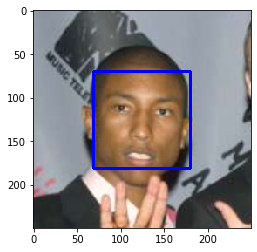

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
%matplotlib inline

In 99% of human images, it found a face
In 13% of dog images, it found a face


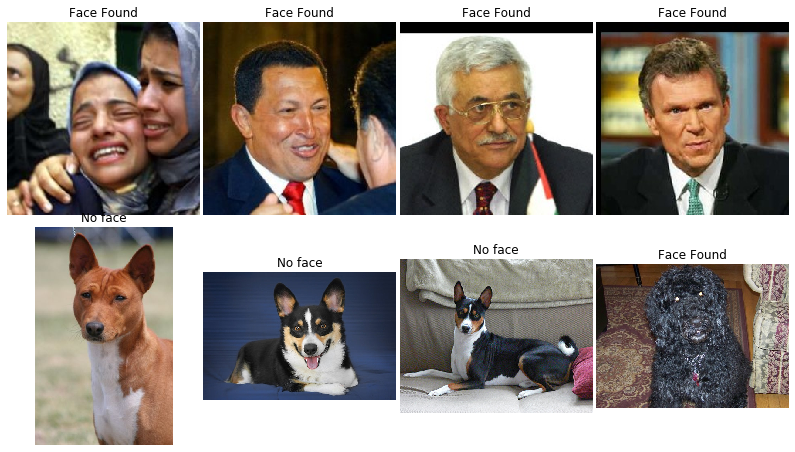

In [5]:
# from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

fig, ax = plt.subplots(2,4, figsize = (14,8))

for k, files in enumerate([human_files, dog_files]):
    count = 0
    for i in range(4):
        # Random selection
        j = np.random.randint(len(files))
        
        # Is there a face
        facelog = face_detector(files[j])
        
        count += 1*facelog
        # Plot the image and set the title accordingly
        img = cv2.imread(files[j])
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax[k,i].imshow(cv_rgb)
        if facelog:
            ax[k,i].set_title('Face Found')
        else:
            ax[k,i].set_title('No face')
        ax[k,i].set_axis_off()

fig.subplots_adjust(wspace=0.02, hspace=0)
        
for k, files in enumerate([human_files_short, dog_files_short]):
    count = 0
    for file in files:
        # Is there a face
        facelog = face_detector(file)
        count+= facelog*1
    
    if k == 0:
        print('In {}% of human images, it found a face'.format(int(count*100/len(human_files_short))))
    else:
        print('In {}% of dog images, it found a face'.format(int(count*100/len(dog_files_short))))

In [6]:
dog_files_test = np.array(glob("dogImages/test/*"))
dog_files_valid = np.array(glob("dogImages/valid/*/*"))
dog_files_train = np.array(glob("dogImages/train/*/*"))
print(len(dog_files_test),len(dog_files_valid),len(dog_files_train))

133 835 6680


In [7]:
ltotal = len(dog_files)
print(len(dog_files_test)/ltotal,len(dog_files_valid)/ltotal,len(dog_files_train)/ltotal)

0.01592623637887678 0.09998802538618129 0.7999042030894503


In [8]:
folders1 = []
folders2 = []
for file in dog_files:
    folders1.append(file.split('/')[1])
    folders2.append(file.split('/')[2])

f1 = set(folders1)
f2 = set(folders2)

numberfiles = np.zeros(len(f2))
for i, folder in enumerate(f2):
    files_train = np.array(glob("dogImages/train/"+folder+"/*"))
    numberfiles[i] = len(files_train)

50.225563909774436 11.81919971169211
132.Xoloitzcuintli 26.0
005.Alaskan_malamute 77.0


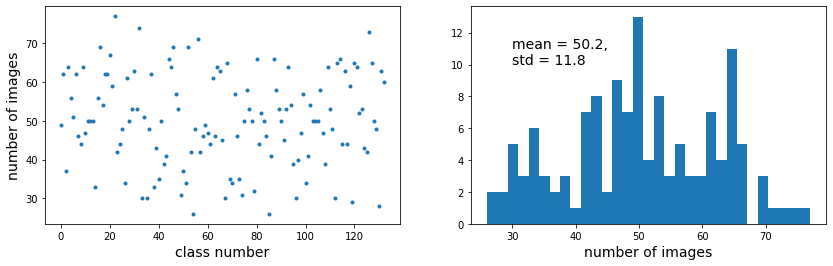

In [20]:
fig, ax  = plt.subplots(1,2 , figsize = (14,4))
ax[0].plot(numberfiles,'.')
ax[0].set_xlabel('class number', fontsize = 14)
ax[0].set_ylabel('number of images', fontsize = 14)
ax[1].hist(numberfiles,31)
ax[1].set_xlabel('histogram', fontsize = 14)
ax[1].set_xlabel('number of images', fontsize = 14)
ax[1].text(30.,10,
           'mean = {:.1f},\nstd = {:.1f}'.format(np.mean(numberfiles),
                                                 np.std(numberfiles)),
          fontsize = 14)
print(np.mean(numberfiles), np.std(numberfiles))
print(list(f2)[numberfiles.argmin()],numberfiles.min())
print(list(f2)[numberfiles.argmax()],numberfiles.max())

In [154]:
h = np.histogram(numberfiles,31)
print('Fraction of breeds with less than 40 images = {:.3f}'.format(
      sum(h[0][h[1][1:]<40])/sum(h[0])))

print('Fraction of breeds with more than 60 images = {:.3f}'.format(
      sum(h[0][h[1][:-1]>60])/sum(h[0])))


Fraction of breeds with less than 40 images = 0.195
Fraction of breeds with more than 60 images = 0.256


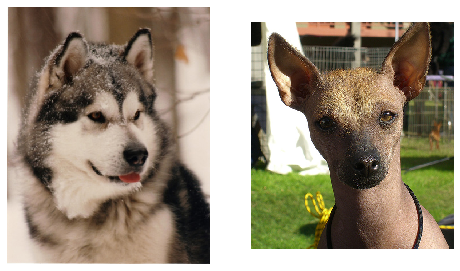

In [167]:
dog_files_ext = ['dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00304.jpg',
                 'dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08288.jpg']

fig, ax = plt.subplots(1,2, figsize = (8,8))
files = dog_files_ext
for i in range(2):
    img = cv2.imread(files[i])
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax[i].imshow(cv_rgb)
    ax[i].set_axis_off()


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [21]:
import torch
import torchvision.models as models
# check if CUDA is available
use_cuda = False


In [22]:
import torch
import torchvision.models as models

# define VGG16 model
mobilenetv2 = models.mobilenet_v2(pretrained=True)


# move model to GPU if CUDA is available
if use_cuda:
    mobilenetv2 = mobilenetv2.cuda()

In [34]:
import imagenet1000_clsidx_to_labels as labels
classes = labels.classes

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

**Before writing function**, let us understand how to provide input data to the network, and what kind of output we receive. As usual the documentation is a bit confusing, but on the web there are some resources where they do go around small details for single image processing:
 - We first load the image with Pillow
 - Then we construct the transformation for preprocessing:
     + Resize image
     + Crop the central part
     + Transform it to a tensor
     + Normalize according to documentation
     + Unsquezze the array to copy it to the network
     + Move it to the cuda device
 - We put VGG16 in evaluation mode 
 - Then, we evaluate it and take it back to the cpu
 - Finally, we need to detach the tensor to forget about the derivatives and transform it into numpy
 - The largest value is the label

Norwich_terrier


Text(300, 13, 'Predicted class is: Norwich terrier\nReal class is: Norwich_terrier')

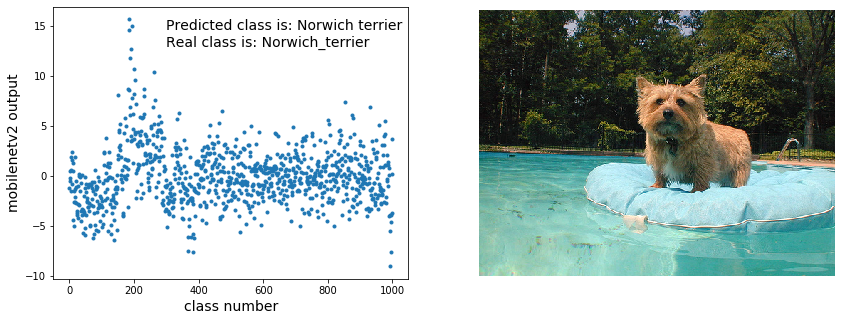

In [94]:
#https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
from PIL import Image
import torchvision.transforms as transforms

    
idx_dog = 101
img = Image.open(dog_files[idx_dog])

normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(), 
                                normalize])

imgtd = transform(img)
batch = torch.unsqueeze(imgtd, 0)
mobilenetv2.eval()

output = mobilenetv2(batch)
outputnp = output.detach().numpy()
fig, ax = plt.subplots(1,2, figsize = (14,5))

ax[0].plot(outputnp.flatten(),'.')
ax[0].set_xlabel('class number', fontsize = 14)
ax[0].set_ylabel('mobilenetv2 output', fontsize = 14)

img = cv2.imread(dog_files[idx_dog])
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax[1].imshow(cv_rgb)
ax[1].set_axis_off()
#ax[1].hist(numberfiles,31)
#ax[1].set_xlabel('histogram', fontsize = 14)
#ax[1].set_xlabel('number of images', fontsize = 14)
real_class = dog_files[idx_dog].split('/')[2].split('.')[1]
print(real_class)
ax[0].text(300,13,'Predicted class is: {}\nReal class is: {}'.format(
            classes[outputnp.argmax()],
            real_class), fontsize = 14)



Now, we are ready to write it

In [51]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [61]:
def mobilenet_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)

    # Preprocessing
    # Defining function
    normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                    std = [0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(), 
                                    normalize])
    
    # Transforming
    imgtd = transform(img)
    batch = torch.unsqueeze(imgtd, 0)
    if use_cuda:
        batch = batch.cuda()
        
    # Network evaluation
    mobilenetv2.eval()

    output = mobilenetv2(batch).cpu()
    outputnp = output.detach().numpy()

    return outputnp.argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [69]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    imgclass = mobilenet_predict(img_path)
    isdog = False
    if imgclass>150 and imgclass<269:
        isdog = True
        
    return isdog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [70]:
%%time
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
print('Performance with Mobilenet v2')

failures = np.zeros(100)
for k, files in enumerate([human_files_short, dog_files_short]):
    count = 0
    for i, file in enumerate(files):
        # Is it a dog?
        isdog = dog_detector(file)
        count+= isdog*1
        failures[i] = isdog*1
        
    if k == 0:
        failures_humans = failures
        print('It classified {}% of human images as dogs'.format(int(count*100/len(human_files_short))))
    else:
        failures_dogs = 1-failures
        print('It classified {}% of dogs images as dogs'.format(int(count*100/len(dog_files_short))))

Performance with Mobilenet v2
It classified 0% of human images as dogs
It classified 100% of dogs images as dogs
CPU times: user 35.2 s, sys: 155 ms, total: 35.4 s
Wall time: 6.09 s


In [67]:
dog_files_short[failures_dogs.argmax()]

'dogImages/valid/090.Italian_greyhound/Italian_greyhound_06157.jpg'

Great_pyrenees


Text(300, 10, 'Predicted class is: Great Pyrenees\nReal class is: Great_pyrenees')

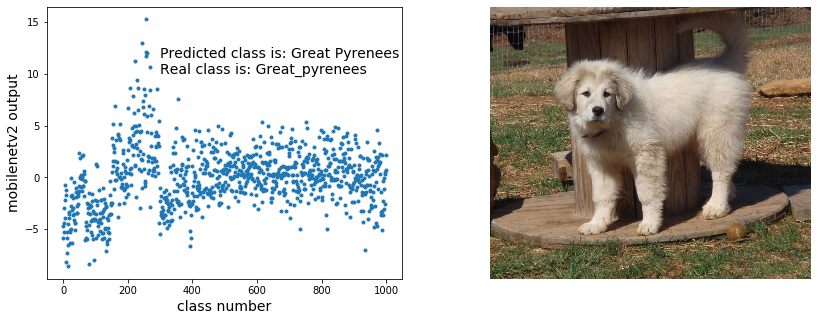

In [91]:

idx_dog = 24
img = Image.open(dog_files_short[idx_dog])

normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(), 
                                normalize])

imgtd = transform(img)
batch = torch.unsqueeze(imgtd, 0)
mobilenetv2.eval()

output = mobilenetv2(batch)
outputnp = output.detach().numpy()
fig, ax = plt.subplots(1,2, figsize = (14,5))

ax[0].plot(outputnp.flatten(),'.')
ax[0].set_xlabel('class number', fontsize = 14)
ax[0].set_ylabel('mobilenetv2 output', fontsize = 14)

img = cv2.imread(dog_files[idx_dog])
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax[1].imshow(cv_rgb)
ax[1].set_axis_off()

real_class = dog_files_short[idx_dog].split('/')[2].split('.')[1]
print(real_class)
ax[0].text(300,10,'Predicted class is: {}\nReal class is: {}'.format(
            classes[outputnp.argmax()],
            real_class), fontsize = 14)

In [147]:
count = 0.0
for idx_dog in range(100):
    img = Image.open(dog_files_short[idx_dog])

    normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                    std = [0.229, 0.224, 0.225])

    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(), 
                                    normalize])

    imgtd = transform(img)
    batch = torch.unsqueeze(imgtd, 0)
    mobilenetv2.eval()

    output = mobilenetv2(batch)
    outputnp = output.detach().numpy()
    real_class = dog_files_short[idx_dog].split('/')[2].split('.')[1].replace("_", " ").lower()
    predicted_class = classes[outputnp.argmax()].lower()
    print(real_class,',',predicted_class,1*(real_class==predicted_class))
    count += 1*(real_class==predicted_class)
    
print(count)

belgian malinois , malinois 0
belgian malinois , malinois 0
belgian malinois , malinois 0
belgian malinois , malinois 0
belgian malinois , malinois 0
belgian malinois , malinois 0
belgian malinois , malinois 0
belgian malinois , malinois 0
parson russell terrier , wire-haired fox terrier 0
parson russell terrier , borzoi, russian wolfhound 0
parson russell terrier , italian greyhound 0
parson russell terrier , toy terrier 0
norwegian elkhound , norwegian elkhound, elkhound 0
norwegian elkhound , norwegian elkhound, elkhound 0
norwegian elkhound , norwegian elkhound, elkhound 0
norwegian elkhound , norwegian elkhound, elkhound 0
norwegian elkhound , norwegian elkhound, elkhound 0
norwegian elkhound , norwegian elkhound, elkhound 0
doberman pinscher , doberman, doberman pinscher 0
doberman pinscher , doberman, doberman pinscher 0
doberman pinscher , doberman, doberman pinscher 0
doberman pinscher , doberman, doberman pinscher 0
doberman pinscher , doberman, doberman pinscher 0
doberman p

33 % accuracy being generous

In [102]:
imgstats = np.zeros((100,4))
for i, file in enumerate(dog_files_short):
    # Is there a face
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgstats[i,:] = *img.mean(axis = (0,1))/255.0, gray.mean()/255.0
    

Text(0, 0.5, 'blue channel')

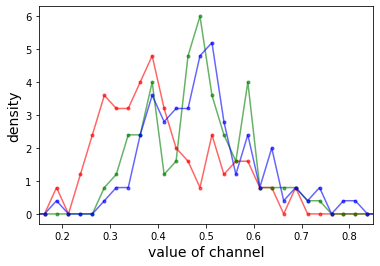

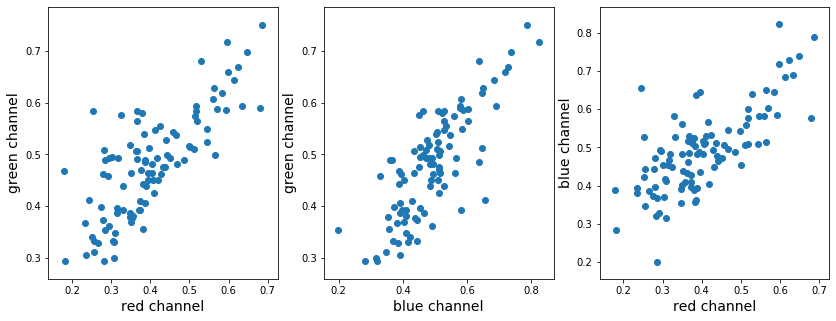

In [113]:
bins = np.linspace(0,1,41)
xb = (bins[1:]+bins[:-1])*0.5
hr = np.histogram(imgstats[:,0],bins,density = True)[0]
hg = np.histogram(imgstats[:,1],bins,density = True)[0]
hb = np.histogram(imgstats[:,2],bins,density = True)[0]
plt.plot(xb, hr, 'r.-', alpha = 0.6)
plt.plot(xb, hg, 'g.-', alpha = 0.6)
plt.plot(xb, hb, 'b.-', alpha = 0.6)
plt.xlim(0.15,0.85)
plt.xlabel('value of channel', fontsize = 14)
plt.ylabel('density', fontsize = 14)

fig,ax = plt.subplots(1,3, figsize = (14,5))
ax[0].scatter(imgstats[:,0], imgstats[:,1])
ax[1].scatter(imgstats[:,2], imgstats[:,1])
ax[2].scatter(imgstats[:,0], imgstats[:,2])
ax[0].set_xlabel('red channel', fontsize = 14)
ax[2].set_xlabel('red channel', fontsize = 14)
ax[1].set_xlabel('blue channel', fontsize = 14)
ax[0].set_ylabel('green channel', fontsize = 14)
ax[1].set_ylabel('green channel', fontsize = 14)
ax[2].set_ylabel('blue channel', fontsize = 14)

Ellen_Pompeo
(894, 895, 3)
Jiri_Novak
(250, 250, 3)
Kurt_Hellstrom
(250, 250, 3)
Laurel_Clark
(250, 250, 3)
(500, 311, 3)
(532, 800, 3)
(2320, 3484, 3)
(240, 240, 3)


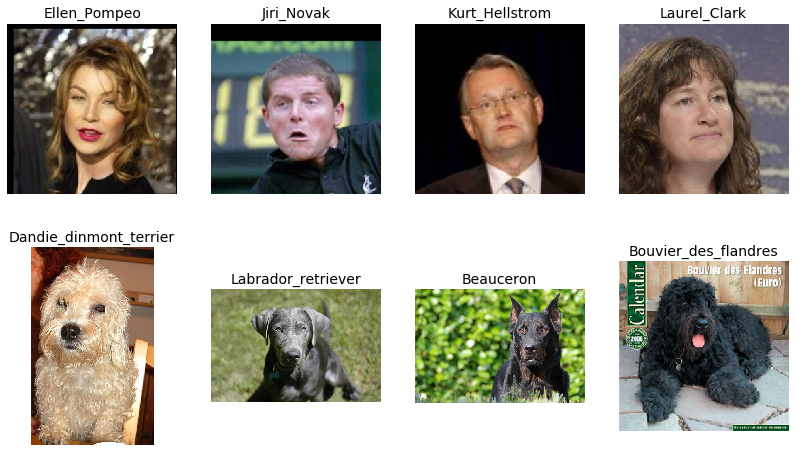

In [124]:
ncol = 4
fig, ax = plt.subplots(2,ncol, figsize = (14,8))

files = human_files
count = 0
k = 0
for i in range(ncol):
    # Random selection
    j = np.random.randint(len(files))

    
    name = files[j].split('/')[1]
    print(name)
    print(img.shape)
    # Plot the image and set the title accordingly
    img = cv2.imread(files[j])
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax[k,i].imshow(cv_rgb)
    ax[k,i].set_title(name,fontsize = 14)
    ax[k,i].set_axis_off()
    
k = 1
files = dog_files
count = 0
for i in range(ncol):
    # Random selection
    j = np.random.randint(len(files))
    dogbreed =files[j].split('/')[2].split('.')[1] 

    # Plot the image and set the title accordingly
    img = cv2.imread(files[j])
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(img.shape)
    ax[k,i].imshow(cv_rgb)
    ax[k,i].set_title(dogbreed,fontsize = 14)

    ax[k,i].set_axis_off()

In [174]:
imgsizes = np.zeros((len(dog_files),3))
for i, file in enumerate(dog_files):
    # Is there a face
    img = cv2.imread(file)
    imgsizes[i,:] = img.shape
    

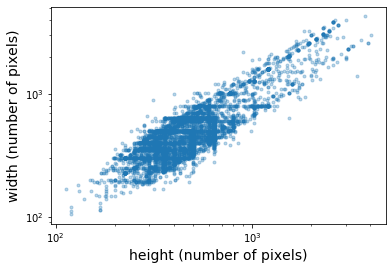

In [185]:
plt.plot(imgsizes[:,0],imgsizes[:,1],'.', alpha = 0.3)
plt.xlabel('height (number of pixels)', fontsize = 14)
plt.ylabel('width (number of pixels)', fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.savefig('sizeimgs.png',dpi = 200)

In [177]:
imgstats = np.zeros((len(dog_files),4))
for i, file in enumerate(dog_files):
    # Is there a face
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgstats[i,:] = *img.mean(axis = (0,1))/255.0, gray.mean()/255.0
    

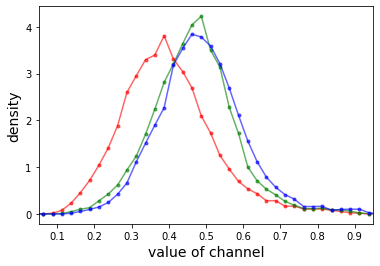

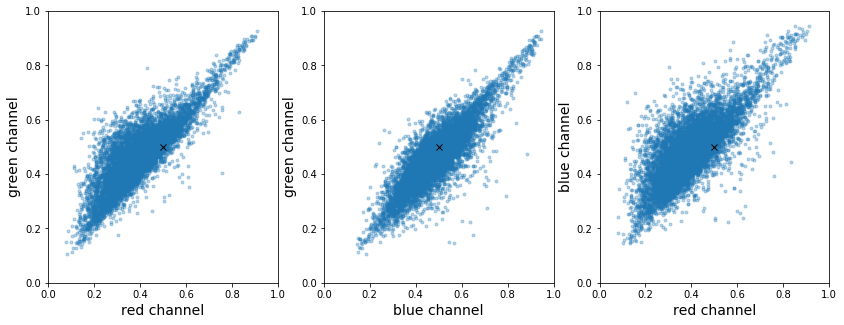

In [182]:
bins = np.linspace(0,1,41)
xb = (bins[1:]+bins[:-1])*0.5
hr = np.histogram(imgstats[:,0],bins,density = True)[0]
hg = np.histogram(imgstats[:,1],bins,density = True)[0]
hb = np.histogram(imgstats[:,2],bins,density = True)[0]
plt.plot(xb, hr, 'r.-', alpha = 0.6)
plt.plot(xb, hg, 'g.-', alpha = 0.6)
plt.plot(xb, hb, 'b.-', alpha = 0.6)
plt.xlim(0.05,0.95)
plt.xlabel('value of channel', fontsize = 14)
plt.ylabel('density', fontsize = 14)

plt.savefig('channels0.png', dpi = 200)

fig,ax = plt.subplots(1,3, figsize = (14,5))
ax[0].plot(imgstats[:,0], imgstats[:,1],'.', alpha = 0.3)
ax[1].plot(imgstats[:,2], imgstats[:,1],'.', alpha = 0.3)
ax[2].plot(imgstats[:,0], imgstats[:,2],'.', alpha = 0.3)
ax[0].set_xlabel('red channel', fontsize = 14)
ax[2].set_xlabel('red channel', fontsize = 14)
ax[1].set_xlabel('blue channel', fontsize = 14)
ax[0].set_ylabel('green channel', fontsize = 14)
ax[1].set_ylabel('green channel', fontsize = 14)
ax[2].set_ylabel('blue channel', fontsize = 14)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[0].plot(0.5,0.5,'kx')
ax[1].plot(0.5,0.5,'kx')
ax[2].plot(0.5,0.5,'kx')

In [184]:
print(imgstats.mean(0))

[0.39679833 0.46614418 0.48672974 0.46440096]
